In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)

# Import data for AirBnB Bangkok listing
df_20210321 = pd.read_csv('./listings_20210321.csv')
df_20210321.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27934,https://www.airbnb.com/rooms/27934,20210321015140,2021-03-22,Nice room with superb city view,Our cool and comfortable one bedroom apartment...,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,120437,https://www.airbnb.com/users/show/120437,Nuttee,2010-05-08,Bangkok,"Hi All, I am nuttee patranavik from Bangkok, T...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/d05a6...,https://a0.muscache.com/im/pictures/user/d05a6...,Victory Monument,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Samsen Nai, Bangkok, Thailand",Ratchathewi,NaN,13.76000,100.54269,Entire condominium,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,"[""Microwave"", ""Pool"", ""Smoke alarm"", ""Dryer"", ...","$1,694.00",3,90,3.0,3.0,90.0,90.0,3.0,90.0,NaN,t,27,57,87,362,2021-03-22,65,0,0,2012-04-07,2020-01-06,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,2,0,0,0.6
1,27942,https://www.airbnb.com/rooms/27942,20210321015140,2021-03-22,Town House (1) bedroom available,<b>The space</b><br />Townhouse with 2 bedroom...,NaN,https://a0.muscache.com/pictures/155668/afc77b...,120462,https://www.airbnb.com/users/show/120462,Donald,2010-05-08,Thailand,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/120462/profil...,https://a0.muscache.com/im/users/120462/profil...,NaN,1.0,1.0,"['email', 'phone']",t,f,NaN,Bangkok Yai,NaN,13.73463,100.47540,Private room in house,Private room,1,NaN,1 bath,1.0,1.0,"[""Cable TV"", ""Kitchen"", ""Air conditioning"", ""F...",$924.00,1,730,1.0,1.0,730.0,730.0,1.0,730.0,NaN,f,0,0,0,0,2021-03-22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,27979,https://www.airbnb.com/rooms/27979,20210321015140,2021-03-31,"Easy going landlord,easy place","<b>The space</b><br />""The village Condominium...",NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,https://www.airbnb.com/users/show/120541,Emy,2010-05-08,"Bangkok, Thailand",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/120541/profil...,https://a0.muscache.com/im/users/120541/profil...,NaN,2.0,2.0,"['email', 'phone']",t,f,NaN,Bang Na,NaN,13.66818,100.61674,Private room in apartment,Private room,2,NaN,1 bath,1.0,2.0,"[""Cable TV"", ""TV"", ""Pool"", ""Shampoo"", ""Hot tub...","$1,188.00",1,730,1.0,1.0,730.0,730.0,1.0,730.0,NaN,t,1,1,1,1,2021-03-31,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
3,28354,https://www.airbnb.com/rooms/28354,20210321015140,2021-04-01,Place near Metro and Shopping Mall ( Monthly o...,Apartment is near 2 shopping mall Central Plaz...,NaN,https://a0.muscache.com/pictures/3097966/efa67...,121848,https://www.airbnb.com/users/show/121848,Jaruwan,2010-05-10,"Bangkok,

In [120]:
# Identify overview data information of the latest listing file
df_20210321.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.928900e+04,1.928900e+04,1.928900e+04,18547.000000,18547.000000,0.0,19289.000000,19289.000000,19289.000000,0.0,17159.000000,18919.000000,19289.000000,19289.000000,19288.000000,19288.00000,1.928800e+04,1.928800e+04,19288.000000,1.928800e+04,0.0,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000,19289.000000,11099.000000,11096.000000,11095.000000,11087.000000,11094.000000,11086.000000,11084.000000,0.0,19289.000000,19289.000000,19289.000000,19289.000000,11357.000000
mean,2.864632e+07,2.021032e+13,1.360558e+08,19.117863,19.117863,NaN,13.745534,100.561009,3.188294,NaN,1.380209,1.847508,10.899321,835.216030,10.788781,11.01462,3.349149e+05,1.336959e+06,10.901120,1.334687e+06,NaN,23.438851,48.490176,74.002437,244.057857,14.641868,0.440147,0.028151,92.952158,9.490807,9.409103,9.576170,9.597170,9.238950,9.334987,NaN,11.824304,8.077868,2.476904,0.477111,0.667424
std,1.252219e+07,4.711060e+00,1.070034e+08,76.053507,76.053507,NaN,0.043921,0.052457,2.286238,NaN,1.230644,2.216468,37.983201,1113.086391,37.779878,38.10674,2.678084e+07,5.354918e+07,37.864823,5.345827e+07,NaN,11.240153,21.482443,31.237795,133.917459,36.535525,1.741620,0.212590,10.707566,1.070606,1.066818,1.004744,0.996919,1.072224,1.074471,NaN,23.320186,22.407662,6.233905,3.755172,0.919318
min,2.793400e+04,2.021032e+13,3.141700e+04,0.000000,0.000000,NaN,13.527300,100.329620,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.869235e+07,2.021032e+13,3.866508e+07,1.000000,1.000000,NaN,13.719690,100.529340,2.000000,NaN,1.000000,1.000000,1.000000,365.000000,1.000000,1.00000,1.120000e+03,1.125000e+03,1.000000,1.120000e+03,NaN,24.000000,54.000000,83.000000,107.000000,0.000000,0.000000,0.000000,91.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.090000
50%,3.100703e+07,2.021032e+13,1.156174e+08,4.000000,4.000000,NaN,13.738850,100.562640,2.000000,NaN,1.000000,1.000000,1.000000,1125.000000,1.000000,1.00000,1.125000e+03,1.125000e+03,1.000000,1.125000e+03,NaN,29.000000,59.000000,89.000000,332.000000,1.000000,0.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,NaN,4.000000,1.000000,0.000000,0.000000,0.290000
75%,3.954514e+07,2.021032e+13,2.219668e+08,12.000000,12.000000,NaN,13.761640,100.587030,4.000000,NaN,1.000000,2.000000,3.000000,1125.000000,3.000000,3.00000,1.125000e+03,1.125000e+03,3.000000,1.125000e+03,NaN,30.000000,60.000000,90.000000,365.000000,11.000000,0.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,11.000000,5.000000,2.000000,0.000000,0.880000
max,4.875134e+07,2.021032e+13,3.929282e+08,1020.000000,1020.000000,NaN,13.953940,100.923440,16.000000,NaN,50.000000,101.000000,1000.000000,100000.000000,1000.000000,1000.00000,2.147484e+09,2.147484e+09,1000.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,676.000000,39.000000,6.000000,100.000000,10.000000,10.000

In [121]:
# Identify the total size of the data to be analysed
df_20210321.shape

(19289, 74)

In [122]:
# Here, we look to identify null columns and remove them
df_20210321.isnull().sum().sort_values()

# Show count of data with non null for column count
np.count_nonzero(df_20210321.isnull().sum())

# Drop all null columns
if np.count_nonzero(df_20210321.isnull()) != 0:
    df_20210321.dropna(axis=1, inplace=True)
    print('Log: Update dataframe to remove empty data columns')
    
# Show the leftover columns
df_20210321.columns

Log: Update dataframe to remove empty data columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'picture_url',
       'host_id', 'host_url', 'host_verifications', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [123]:
# Clean up columns we are not looking to use for analysis in this scope
try:
    df_20210321.drop(columns = [
        'listing_url'
        ,'scrape_id'
        ,'last_scraped'
        ,'picture_url'
        ,'host_url'
        ,'latitude'
        ,'longitude'
        ,'minimum_nights'
        ,'maximum_nights'
        ,'availability_30'
        ,'availability_60'
        ,'availability_90'
        ,'availability_365'
        ,'calendar_last_scraped'
        ,'number_of_reviews'
        ,'number_of_reviews_ltm'
        ,'number_of_reviews_l30d'
        ,'instant_bookable'
        ,'calculated_host_listings_count'
        ,'calculated_host_listings_count_entire_homes'
        ,'calculated_host_listings_count_private_rooms'
        ,'calculated_host_listings_count_shared_rooms'
    ], axis=1, inplace=True)
except KeyError:
    print("KeyError exception occurred \nPerhaps already dropped columns")


In [124]:
# Verify update dataframe for cleaned column data
df_20210321.head()

,id,host_id,host_verifications,neighbourhood_cleansed,property_type,room_type,accommodates,amenities,price,has_availability
0,27934,120437,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Ratchathewi,Entire condominium,Entire home/apt,3,"[""Microwave"", ""Pool"", ""Smoke alarm"", ""Dryer"", ...","$1,694.00",t
1,27942,120462,"['email', 'phone']",Bangkok Yai,Private room in house,Private room,1,"[""Cable TV"", ""Kitchen"", ""Air conditioning"", ""F...",$924.00,f
2,27979,120541,"['email', 'phone']",Bang Na,Private room in apartment,Private room,2,"[""Cable TV"", ""TV"", ""Pool"", ""Shampoo"", ""Hot tub...","$1,188.00",t
3,28354,121848,"['email', 'phone', 'facebook', 'reviews', 'jum...",Chatu Chak,Entire apartment,Entire home/apt,2,"[""Dedicated workspace"", ""Air conditioning"", ""H...","$1,095.00",t
4,28745,123784,"['email', 'phone']",Bang Kapi,Private room in apartment,Private room,2,"[""Long term stays allowed""]",$800.00,t


In [125]:
# Check data type whether it is appropriate or not
df_20210321.dtypes

id                         int64
host_id                    int64
host_verifications        object
neighbourhood_cleansed    object
property_type             object
room_type                 object
accommodates               int64
amenities                 object
price                     object
has_availability          object
dtype: object

In [126]:
# Check data to validate any missing data
df_20210321.isnull().sum().sort_values(ascending=False)

id                        0
host_id                   0
host_verifications        0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
amenities                 0
price                     0
has_availability          0
dtype: int64

In [127]:
def convert_currency_to_float(df,column):
    '''
    Convert current to float
    
    Parameters
    ----------
    df : Dataframe 
        Dataframe used to convert the currency to float
    column : str
        String of the column to convert from currency to float
    
    Returns
    ----------
    Series
        DataFrame series of the converted column
    
    Example
    ----------
    df_20210321['price'] = convert_currency_to_float(df_20210321,'price')

    '''
    # Clean up value of price which is object to be float replacing dollar sign
    currency_to_float = lambda col: float(col.replace('$','').replace(',',''))

    # If the price is object, then apply and update to flow data
    if df[column].dtype == object:
        df[column] = df[column].apply(currency_to_float)
        print('Log: Update' + ' :' + column + ': ' + 'from object to float')
    else:
        print('DataFrame and column is not object type!')
        return df[column]
    return df[column]


In [128]:
# Convert current column to float for usage
df_20210321['price'] = convert_currency_to_float(df_20210321,'price')
df_20210321['price'].head()

Log: Update :price: from object to float


0    1694.0
1     924.0
2    1188.0
3    1095.0
4     800.0
Name: price, dtype: float64

In [129]:
# Identify data which needs to be extracted out and clean. Such as Amenities column
df_20210321['amenities']

0        ["Microwave", "Pool", "Smoke alarm", "Dryer", ...
1        ["Cable TV", "Kitchen", "Air conditioning", "F...
2        ["Cable TV", "TV", "Pool", "Shampoo", "Hot tub...
3        ["Dedicated workspace", "Air conditioning", "H...
4                              ["Long term stays allowed"]
                               ...                        
19284    ["Carbon monoxide alarm", "Pool", "Smoke alarm...
19285    ["Shampoo", "Hair dryer", "Bed linens", "Hot w...
19286    ["Shampoo", "Hair dryer", "Bed linens", "Wifi"...
19287    ["Microwave", "Smoke alarm", "Security cameras...
19288    ["TV", "Lock on bedroom door", "Shampoo", "Coo...
Name: amenities, Length: 19289, dtype: object

In [130]:
# Function to create dummy categorical data based multiple values in one category list
def clean_create_dummy(df, column):
    '''
    Clean DataFrame data and create categorical dummy data with the input column
    
    Parameters
    ----------
    df : Dataframe 
        Dataframe used to clean data and create dummy values
    column : str
        String of the column to clean data and create dummy values
    
    Returns
    ----------
    DataFrame
        DataFrame of the categorical dummy data generated
    
    Example
    ----------
    df_20210321 = clean_create_dummy(df_20210321,'host_verifications')

    '''
# If column already has dummy structure, then ignore
    if column+"_" in df.columns:
        print("Already have " + column + "_ : as column in dataframe. No new dummy created")
        return df
    
# Create temp dataframe column  
    temp_df = df[column]
# Clean data and replace the unnecessary delimiters
    clean_data_fn = lambda col: (col.replace('[','').replace(']','').replace(' ','').replace('"','').replace("'",""))
    temp_df = temp_df.apply(clean_data_fn)
    temp_df = temp_df.str.split(pat=",",expand=True)
# Create dummy data 
    temp_df = pd.get_dummies(data=temp_df,prefix=column)
    temp_df = temp_df.groupby(by=temp_df.columns, axis=1).sum()
    df_dummy = pd.concat([df,temp_df],axis=1)
    return df_dummy

In [131]:
# Clean the dataframe and update with categorical dummy data
df_20210321 = clean_create_dummy(df_20210321,'host_verifications')
df_20210321 = clean_create_dummy(df_20210321,'amenities')
df_20210321 = clean_create_dummy(df_20210321,'has_availability')
df_20210321.head()

,id,host_id,host_verifications,neighbourhood_cleansed,property_type,room_type,accommodates,amenities,price,has_availability,host_verifications_,host_verifications_None,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_government_id,host_verifications_identity_manual,host_verifications_jumio,host_verifications_kba,host_verifications_manual_offline,host_verifications_manual_online,host_verifications_offline_government_id,host_verifications_phone,host_verifications_reviews,host_verifications_selfie,host_verifications_sent_id,host_verifications_sesame,host_verifications_sesame_offline,host_verifications_weibo,host_verifications_work_email,host_verifications_zhima_selfie,amenities_,amenities_10spaces,amenities_32\HDTV,amenities_32\HDTVwithNetflix,amenities_32\TV,amenities_42\HDTV,amenities_42\HDTVwithstandardcable,amenities_42\TVwithstandardcable,amenities_43\HDTVwithNetflix,amenities_50\HDTVwithAppleTV,amenities_50\HDTVwithNetflix,amenities_50\HDTVwithstandardcable,amenities_55\HDTVwithChromecast,amenities_55\HDTVwithstandardcable,amenities_Airconditioning,amenities_Airportshuttle,amenities_AmazonPrimeVideo,amenities_AppleTV,amenities_Arobodysoap,amenities_Aroconditioner,amenities_Aroshampoo,amenities_BBQgrill,amenities_Babybath,amenities_Babymonitor,amenities_Babysafetygates,amenities_Babysitterrecommendations,amenities_Backyard,amenities_Bakingsheet,amenities_Barbecueutensils,amenities_Bathrobes,amenities_Bathroomessentials,amenities_Bathtub,amenities_Beachessentials,amenities_Beachfront,amenities_Bedlinens,amenities_Bedroomcomforts,amenities_Bidet,amenities_Bikes,amenities_Boardgames,amenities_Bodysoap,amenities_Bootsbodysoap,amenities_Bootsconditioner,amenities_Bootsshampoo,amenities_Bottledwater,amenities_Breadmaker,amenities_Breakfast,amenities_Buildingstaff,amenities_CableTV,amenities_Carbonmonoxidealarm,amenities_Ceilingfan,amenities_Centralairconditioning,amenities_Ceramichobtopelectricstove,amenities_Changingtable,amenities_Children\u2019sbooksandtoys,amenities_Children\u2019sdinnerware,amenities_Chromecast,amenities_Cleaningbeforecheckout,amenities_Cleaningproducts,amenities_Clothingstorage,amenities_Clothingstorage:closet,amenities_Clothingstorage:closetandwardrobe,amenities_Clothingstorage:dresser,amenities_Clothingstorage:dresserandcloset,amenities_Clothingstorage:walk-incloset,amenities_Clothingstorage:walk-inclosetandcloset,amenities_Clothingstorage:wardrobe,amenities_Clothingstorage:wardrobeandcloset,amenities_Coffeemaker,amenities_Complimentaryselfparking,amenities_Concierge,amenities_Conditioner,amenities_Continentalbreakfastavailable\u2014\u0e3f270perpersonperday,amenities_Cookingbasics,amenities_Crib,amenities_Dedicatedworkspace,amenities_Dedicatedworkspace:desk,amenities_Dedicatedworkspace:deskandofficechair,amenities_Dedicatedworkspace:deskandtable,amenities_Dedicatedworkspace:officechairanddesk,amenities_Dedicatedworkspace:table,amenities_Dedicatedworkspace:tableanddesk,amenities_Dedicatedworkspace:tableandofficechair,amenities_Diningtable,amenities_Dishesandsilverware,amenities_Dishwasher,amenities_Dryer,amenities_Dryer\u2013Inbuilding,amenities_Dryer\u2013\u00a0Inunit,amenities_Dryingrackforclothing,amenities_EVcharger,amenities_Electricstove,amenities_Elevator,amenities_Essentials,amenities_Ethernetconnection,amenities_Extrapillowsandblankets,amenities_Fireextinguisher,amenities_Fireplaceguards,amenities_Firstaidkit,amenities_Fitnesscenter,amenities_Freecarportonpremises,amenities_Freedrivewayparkingonpremises,amenities_Freedrivewayparkingonpremises\u20131space,amenities_Freedryer\u2013Inbuilding,amenities_Freedryer\u2013Inunit,amenities_Freeparkinggarageonpremises,amenities_Freeparkinggarageonpremises\u20131space,amenities_Freeparkinggarageonpremises\u201330spaces,amenities_Freeparkingonpremises,amenities_Freeparkingonpremises\u20131space,amenities_Freeparkingonpremises\u20132spaces,amenities_Freeresidentialgarageonpremises,amenities_Freestreetparking,amen

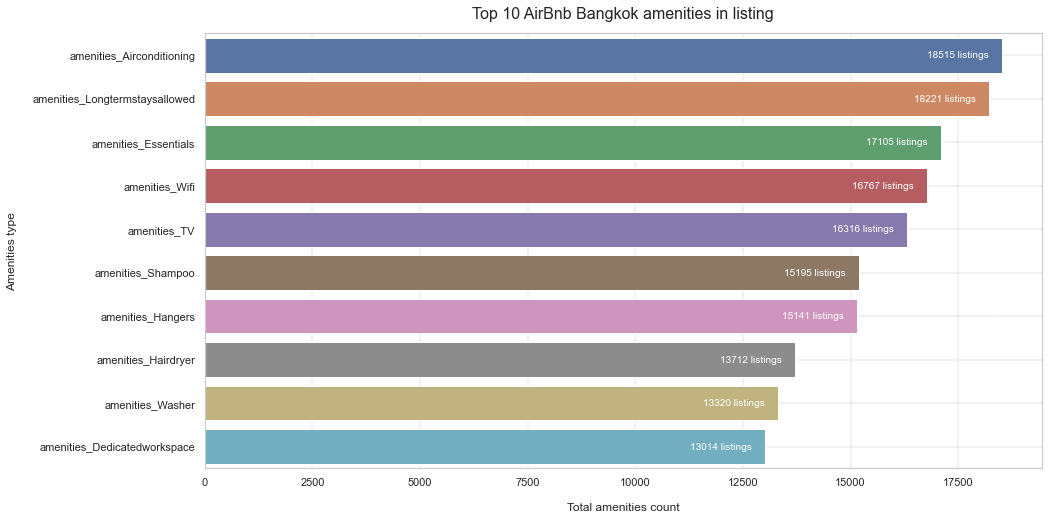

In [132]:
# Business question 1: What are the top 10 most common amenities for AirBnB listings in Bangkok?

# Filter top 10 amenities data
amenities_top10_data = df_20210321.filter(like='amenities_', axis=1).sum().sort_values(ascending=False)[:10]

# Plot the data in graph to show
plt.figure(figsize = (15,8))
ax = sns.barplot(data=amenities_top10_data.reset_index(), y = 'index', x = 0)

# Apply patch wording onto the graphs
for p in ax.patches:
    ax.annotate("%.0f listings" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(-75, 0), textcoords='offset points', ha="left", va="center", color = 'white')

# Configure label and title wordings
plt.title("Top 10 AirBnb Bangkok amenities in listing", fontsize = 16, y=1.02)
plt.rcParams["axes.labelsize"] = 12
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
plt.xlabel("Total amenities count",labelpad=15);
plt.ylabel("Amenities type",labelpad=15);

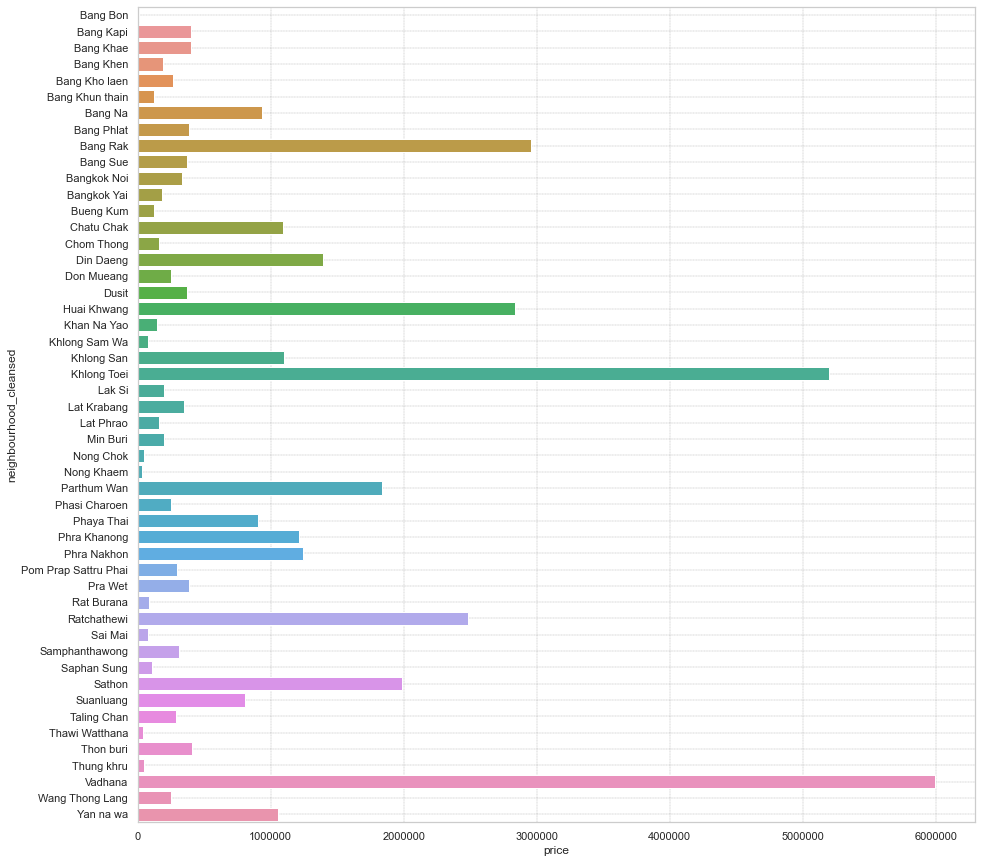

In [135]:
# Business question 2: What are the top 10 areas in Bangkok with the most listing value? How many listings are there?

# Sum data group by neighbourhood for analysis
neighbor_cleaned_price_data = df_20210321.groupby('neighbourhood_cleansed').sum()['price'].reset_index()

# Plot total data sum graph
plt.figure(figsize = (15,15))
sns.barplot(data = neighbor_cleaned_price_data,x="price",y='neighbourhood_cleansed')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
plt.ticklabel_format(style='plain', axis='x')

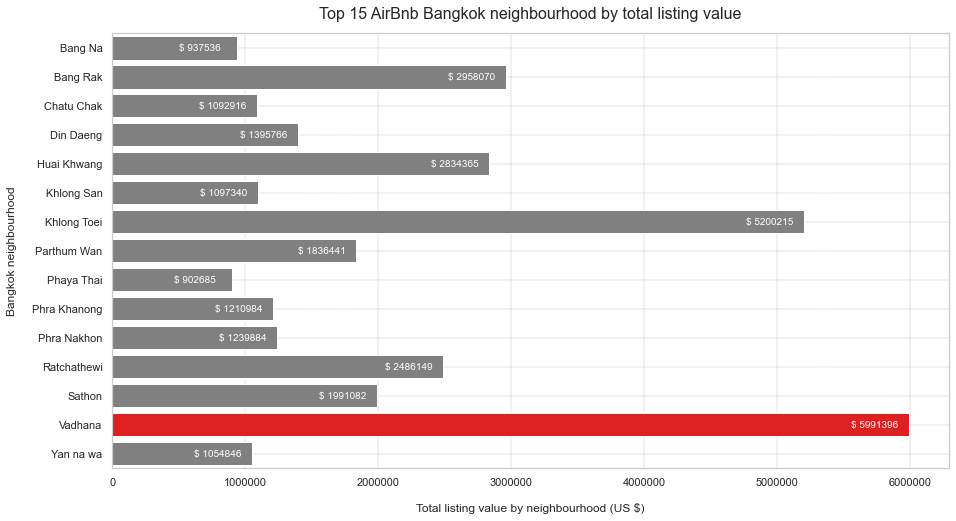

In [136]:
# Select top 10 neighborhood data to plot
top10_neighborhood_price = neighbor_cleaned_price_data.nlargest(15,columns='price').sort_values(ascending=True, by='neighbourhood_cleansed')
clrs = ['grey' if (x < max(top10_neighborhood_price.price)) else 'red' for x in top10_neighborhood_price.price ]

# Set figure plot size and plot data
plt.figure(figsize = (15,8))
ax = sns.barplot(data = top10_neighborhood_price,x="price",y='neighbourhood_cleansed',palette=clrs)

# Setup styling and listing values
for p in ax.patches:
    ax.annotate("$ %.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(-58, 0), textcoords='offset points', ha="left", va="center", color = 'white')

plt.title("Top 15 AirBnb Bangkok neighbourhood by total listing value", fontsize = 16, y=1.02)
plt.rcParams["axes.labelsize"] = 12
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
plt.xlabel("Total listing value by neighbourhood (US $)",labelpad=15);
plt.ylabel("Bangkok neighbourhood",labelpad=15);
plt.ticklabel_format(style='plain', axis='x')

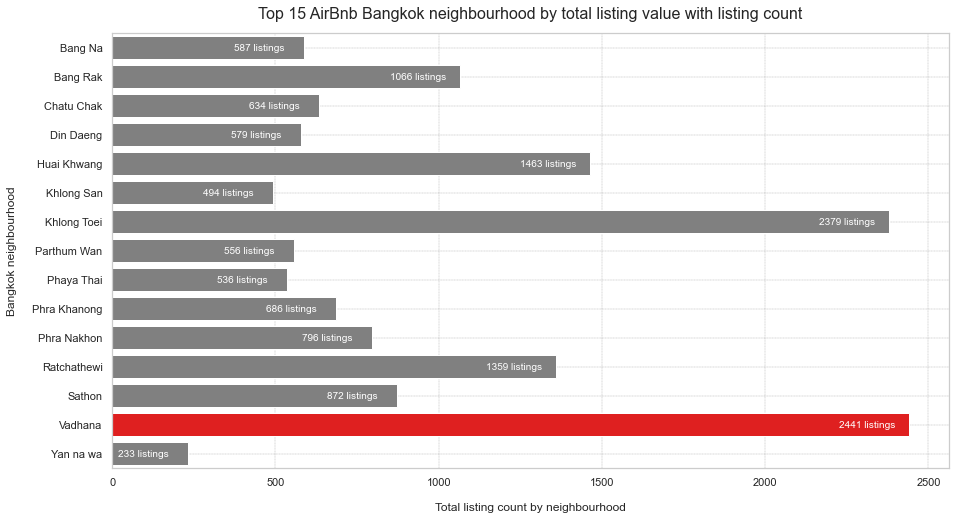

In [137]:
# Setup and plot for listing count
plt.figure(figsize = (15,8))
ax = sns.countplot(data=df_20210321[df_20210321['neighbourhood_cleansed'].isin(top10_neighborhood_price.neighbourhood_cleansed)].sort_values(ascending=True,by='neighbourhood_cleansed')
              , y = 'neighbourhood_cleansed', palette=clrs)

for p in ax.patches:
    ax.annotate("%.0f listings" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(-70, 0), textcoords='offset points', ha="left", va="center", color = 'white')

plt.title("Top 15 AirBnb Bangkok neighbourhood by total listing value with listing count", fontsize = 16, y=1.02)
plt.rcParams["axes.labelsize"] = 12
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
plt.xlabel("Total listing count by neighbourhood",labelpad=15);
plt.ylabel("Bangkok neighbourhood",labelpad=15);

<AxesSubplot:xlabel='price', ylabel='neighbourhood_cleansed'>

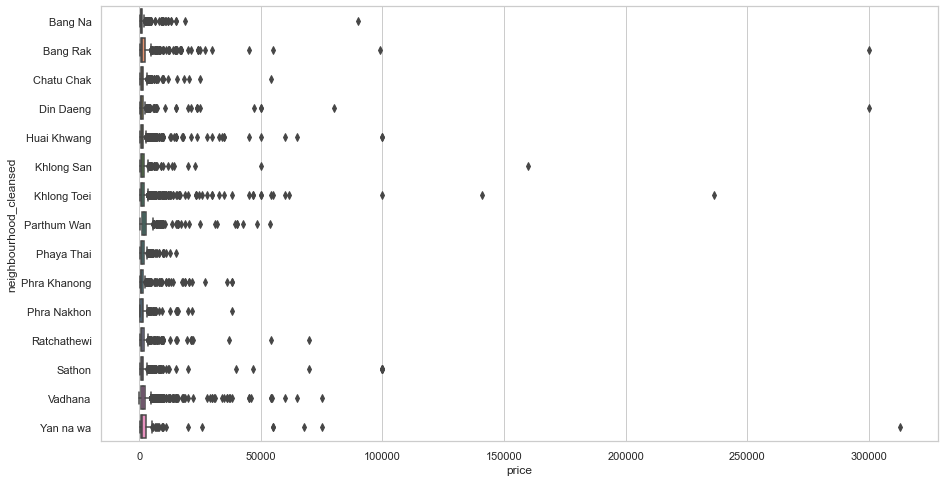

In [138]:
# Further analysis to see how the distribution of price is in the listed area and their count
plt.figure(figsize = (15,8))
sns.set_theme(style="whitegrid")
sns.boxplot(data = df_20210321[df_20210321['neighbourhood_cleansed'].isin(top10_neighborhood_price.neighbourhood_cleansed)].sort_values(ascending=True,by='neighbourhood_cleansed')
                , x = 'price',y='neighbourhood_cleansed')

,host_since,host_id,host_id_count_cumsum
1969,2018-07-11,182,12986
945,2015-07-27,131,4845
1907,2018-05-04,98,12422
355,2013-09-06,79,1323
611,2014-07-28,79,2487
1206,2016-04-20,78,7203
2529,2020-02-18,73,17867
1092,2015-12-24,71,6184
2124,2018-12-19,70,14513
1586,2017-05-21,66,10099


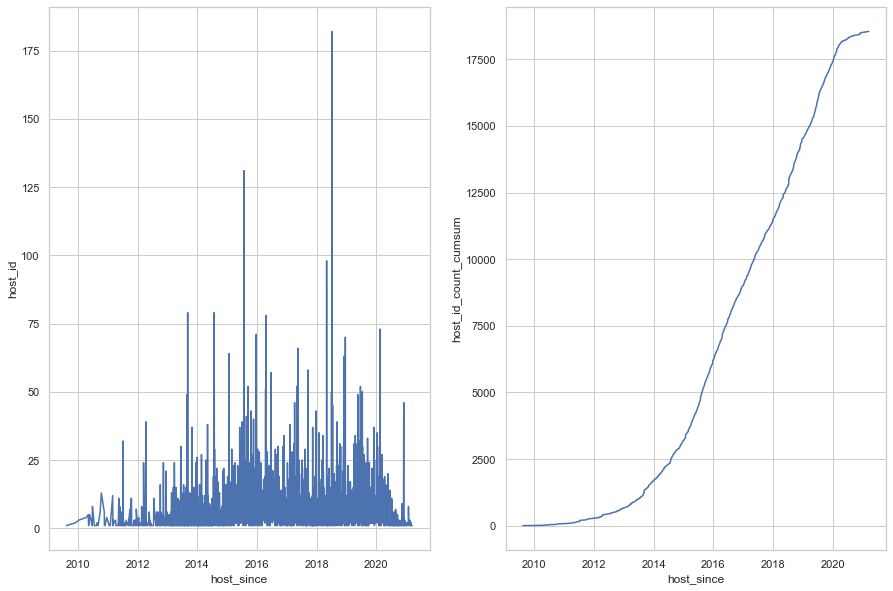

In [176]:
# Business question 3: What are the growth trend in number of AirBnB hosts overtime in Bangkok?

# Read in data for analysis again for host_since
df_20210321 = pd.read_csv('./listings_20210321.csv')

# Drop null values in host_since data
df_20210321.dropna(inplace=True, axis=0, subset=['host_since'])

# df_listing_20210321['host_since_count'] = 
host_since_count = df_20210321.groupby('host_since').count()['host_id'].reset_index()
host_since_count['host_id_count_cumsum'] = host_since_count.host_id.cumsum()

# # Convert data from string to datetime
host_since_count['host_since'] = pd.to_datetime(host_since_count['host_since'])

# # This shows that a lot of hosts are not in this list anymore too as well
fig, ax =plt.subplots(1,2, figsize = (15,10))
sns.lineplot(ax=ax[0],x = host_since_count['host_since'],y = host_since_count['host_id']);
sns.lineplot(ax=ax[1], x = host_since_count['host_since'],y = host_since_count['host_id_count_cumsum']);

# Shows data for the day with hop host_id created count
host_since_count.nlargest(10,columns='host_id').sort_values(ascending=False, by='host_id')

In [183]:
# Business question 4: What is the latest total value of AirBnB listings in Bangkok? 

# Reload all required data to start fresh
df_20210321 = pd.read_csv('./listings_20210321.csv')
df_20210222 = pd.read_csv('./listings_20210222.csv')
df_20210126 = pd.read_csv('./listings_20210126.csv')
df_20201223 = pd.read_csv('./listings_20201223.csv')
df_20201129 = pd.read_csv('./listings_20201129.csv')
df_20201025 = pd.read_csv('./listings_20201025.csv')

# Create temp dataframe for date and information to create
temp_df = pd.DataFrame()
temp_df['date'] = [
    '20210321'
    ,'20210222'
    ,'20210126'
    ,'20201223'
    ,'20201129'
    ,'20201025'
]

# Price sum calculation for each date
df_20210321['price'] = convert_currency_to_float(df_20210321,'price')
df_20210222['price'] = convert_currency_to_float(df_20210222,'price')
df_20210126['price'] = convert_currency_to_float(df_20210126,'price')
df_20201223['price'] = convert_currency_to_float(df_20201223,'price')
df_20201129['price'] = convert_currency_to_float(df_20201129,'price')
df_20201025['price'] = convert_currency_to_float(df_20201025,'price')

# Sum price for each date
temp_df['sum_price'] = list([
    df_20210321['price'].sum()
     ,df_20210222['price'].sum()
     ,df_20210126['price'].sum()
     ,df_20201223['price'].sum()
     ,df_20201129['price'].sum()
     ,df_20201025['price'].sum()
])

# Sum total listing count
temp_df['listing_count'] = list([
    df_20210321['id'].nunique()
     ,df_20210222['id'].nunique()
     ,df_20210126['id'].nunique()
     ,df_20201223['id'].nunique()
     ,df_20201129['id'].nunique()
     ,df_20201025['id'].nunique()
])

# Sum total host count
temp_df['host_count'] = list([
    df_20210321['host_id'].nunique()
     ,df_20210222['host_id'].nunique()
     ,df_20210126['host_id'].nunique()
     ,df_20201223['host_id'].nunique()
     ,df_20201129['host_id'].nunique()
     ,df_20201025['host_id'].nunique()
])

# Sum total superhosts
temp_df['superhost_count'] = list([
    df_20210321.groupby('host_is_superhost').count()['host_id'].t
     ,df_20210222.groupby('host_is_superhost').count()['host_id'].t
     ,df_20210126.groupby('host_is_superhost').count()['host_id'].t
     ,df_20201223.groupby('host_is_superhost').count()['host_id'].t
     ,df_20201129.groupby('host_is_superhost').count()['host_id'].t
     ,df_20201025.groupby('host_is_superhost').count()['host_id'].t
])

# Total has availability count on listing
temp_df['has_availability_true_count'] = list([
    df_20210321.groupby('has_availability').count()['id'].t
     ,df_20210222.groupby('has_availability').count()['id'].t
     ,df_20210126.groupby('has_availability').count()['id'].t
     ,df_20201223.groupby('has_availability').count()['id'].t
     ,df_20201129.groupby('has_availability').count()['id'].t
     ,df_20201025.groupby('has_availability').count()['id'].t
])

# Sum number of reviews
temp_df['sum_number_of_reviews'] = list([
    df_20210321['number_of_reviews'].sum()
     ,df_20210222['number_of_reviews'].sum()
     ,df_20210126['number_of_reviews'].sum()
     ,df_20201223['number_of_reviews'].sum()
     ,df_20201129['number_of_reviews'].sum()
     ,df_20201025['number_of_reviews'].sum()
])

# Shows the cleaned data 
temp_df

Log: Update :price: from object to float
Log: Update :price: from object to float
Log: Update :price: from object to float
Log: Update :price: from object to float
Log: Update :price: from object to float
Log: Update :price: from object to float


,date,sum_price,listing_count,host_count,superhost_count,has_availability_true_count,sum_number_of_reviews
0,20210321,40400255.00,19289,8296,3698,18683,282427
1,20210222,40237541.00,19361,8327,3883,18773,284342
2,20210126,39998418.00,19400,8357,3901,18813,288746
3,20201223,40958341.86,19709,8363,4401,19136,290157
4,20201129,40109760.00,19815,8428,4462,19808,293969
5,20201025,39940129.00,19960,8431,4534,19960,300412


In [200]:
# Business question 5: Given an estimated number of listing at the end of the year 2021, what would be our total listing value predictions?

# Take in date and listing count, we want to predict the sum price and other factors
X_2 = temp_df[['date','listing_count']]
y_2 = temp_df[['sum_price','host_count' ,'superhost_count','has_availability_true_count','sum_number_of_reviews']]

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2 , test_size=.30, random_state=42)

reg = LinearRegression(normalize=True).fit(X_2_train, y_2_train)

d_3 = {'date': ['20210822', '20211222'], 'listing_count': [19289, 19289]}
df3 = pd.DataFrame(data=d_3)
y_predict_3 = reg.predict(df3)

print('Prediction for 20211222 total value price: \n', y_predict_3[1][0])
print('Percentage diff between 20210321 and 20211222: \n'
      , ((40400255.0 - y_predict_3[1][0]) /y_predict_3[1][0]) * 100.0
      , '%')
print('Therefore, estimated an increase of 0.5% growth in around 9 months time')


Prediction for 20211222 total value price: 
 40196845.25293541
Percentage diff between 20210321 and 20211222: 
 0.5060341073650209 %
Therefore, estimated an increase of 0.5% growth in around 9 months time


Reg score: 
 0.9273742552276941


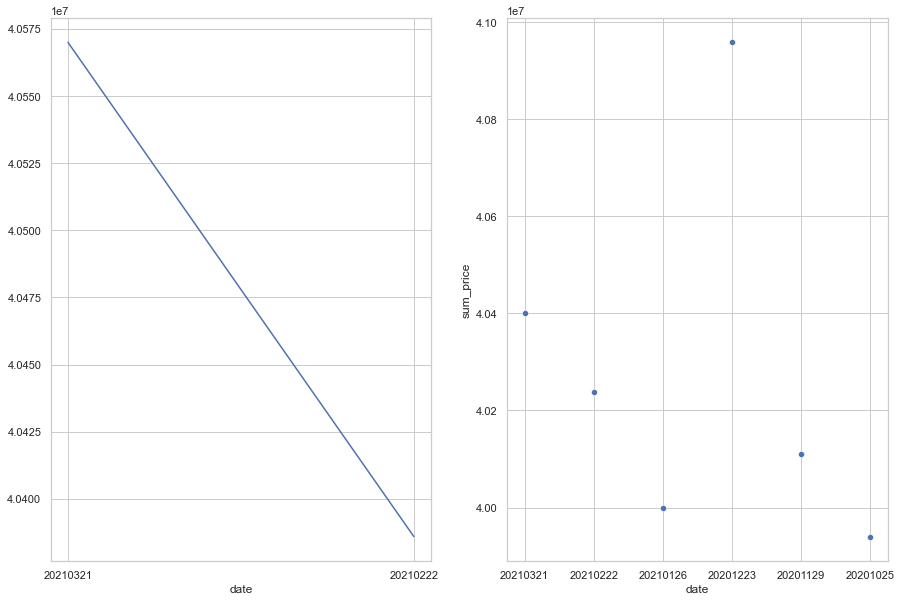

In [201]:
# Extra analysis
# Setup the data that we want to use for input
X_2 = temp_df[['date'
               , 'listing_count'
               , 'host_count'
               , 'superhost_count'
               ,'has_availability_true_count'
               ,'sum_number_of_reviews']]

# Setup the data we want to output
y_2 = temp_df['sum_price']

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2 , test_size=.30, random_state=42)
reg = LinearRegression(normalize=True).fit(X_2_train, y_2_train)
y_predict = reg.predict(X_2_test)


fig, ax =plt.subplots(1,2, figsize = (15,10))
sns.lineplot(ax=ax[0],x = X_2_test['date'],y = y_predict)
sns.scatterplot(ax=ax[1],x = X_2['date'],y = y_2)

print('Reg score: \n', reg.score(X_2,y_2))

0    20210321
1    20210222
Name: date, dtype: object

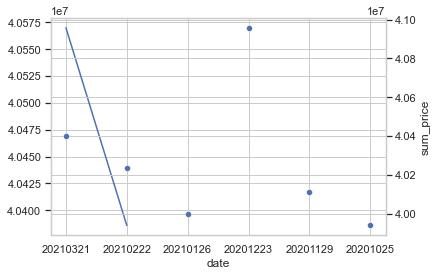

In [202]:
fig, ax = plt.subplots()
    
sns.lineplot(ax=ax,x = X_2_test['date'],y = y_predict)
ax2 = ax.twinx()
sns.scatterplot(ax=ax2,x = X_2['date'],y = y_2)

X_2_test['date']